In [1]:
# load data
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plane
images size: torch.Size([4, 3, 32, 32])
labels size: torch.Size([4])


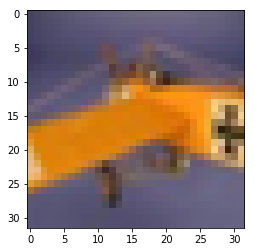

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(trainloader)
images,labels = dataiter.next()

def imshow(img):
    img = img*0.5+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
imshow(images[0])
print(classes[labels[0]])
print("images size:",images.size())
print("labels size:",labels.size())

In [3]:
# define a neural network

import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [4]:
# training 
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        inputs,labels = Variable(inputs),Variable(labels)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        print(loss.data)
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
        
        if i==5:
            break
        if i%2000==1999:
            print("[%d, %d] loss:%.3f" % (epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print("Training completed!")


 2.2836
[torch.FloatTensor of size 1]


 2.2991
[torch.FloatTensor of size 1]


 2.3331
[torch.FloatTensor of size 1]


 2.2973
[torch.FloatTensor of size 1]


 2.2717
[torch.FloatTensor of size 1]


 2.2981
[torch.FloatTensor of size 1]


 2.3350
[torch.FloatTensor of size 1]


 2.3026
[torch.FloatTensor of size 1]


 2.2629
[torch.FloatTensor of size 1]


 2.2638
[torch.FloatTensor of size 1]


 2.3344
[torch.FloatTensor of size 1]


 2.3289
[torch.FloatTensor of size 1]

Training completed!
